## Executive Summary FLIGHT DELAYS

In this project, I intend to produce a tool that can predict the status of your next flight and help you prepare for the possible delays.
This tool will take some information about your next flight as input (<b>origin</b>, <b>destination</b>, <b>day of the week</b>, <b>time of the day</b>, and <b>airline</b>), and predicts whether or not it will be delayed, and by how much.

In order to build the required datasets, flight delay data were downloaded from Department Of Transportation flight delay portal. Zipped files are later read and merged into one dataframe. This Datafram, among trained models,
are all pickled for convenience.
The user of this tool is the passanger who is planning his/her trip to the airport. The outcome of this binary classification is status of the flight (ONTIME/DELAYED). Since the cost of incorrectly predicting an ontime or delayed flights are not the same, for the sake of this project it is assumed that the user, in the event of incorrectly classifying the DELAYED flight as ONTIME, incurrs a loss equal to three times as much compared to when the tool incorrectly classifies a DELAYED flight as ONTIME.

User is given ability to select among 6 different pre-trained models for the predictions. AUC calculations however have shown that <b>Random Forest</b> model is more accurate across all classification thresholds. For the current asymmetric cost of mis-classficiation, it is shown that the correct threshold is about 20% (Any flight with higher than 20% likelihood of delay is going to be classified as DELAYED)

Finally, the user is provided with an interactive tool to predict the status of his/her flight along with the predicted amount of delay.

<b> Data Portals and References </b><br>
[1] https://www.transtats.bts.gov<br>
[2] Data Mining For business Analytics, Schmueli et al

# 0. Downloading and preparing data

In the first part of the notebook, I have written the code that downloads the data from department of transportation for every month of every year separately

In [1]:
import requests

In [ ]:
url = 'https://www.transtats.bts.gov/DL_SelectFields.aspx?gnoyr_VQ=FGJ&QO_fu146_anzr=b0-gvzr'

header = {
    "Host": "www.transtats.bts.gov",
    "Accept" : "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,*/*;q=0.8",
    "Accept-Encoding" : "gzip, deflate, br",
    "Accept-Language" : "en-US,en;q=0.5",
    "Connection" : "keep-alive",
    "Content-Length" : "12342",
    "Content-Type" : "application/x-www-form-urlencoded",
    "Cookie" : "_ga_NQ5ZN114SB=GS1.1.1655303685.4.1.1655303879.0; _ga=GA1.2.643660820.1654890174; _ga=GA1.3.643660820.1654890174; __utma=261918792.643660820.1654890174.1654897216.1655303687.3; __utmz=261918792.1654890174.1.1.utmcsr=(direct)|utmccn=(direct)|utmcmd=(none); QSI_SI_e8TSnTOxZxScWdT_intercept=true; ASP.NET_SessionId=3xleeotckvsvzerscz5wadts; f5avraaaaaaaaaaaaaaaa_session_=DAFBDEAAAHEADMLHOGCPHHOCJIDHHLABLOCOPBHOAMPBACOALCHGGPIFCMJGNPNLNEGDJLKJENAHAKEEPNOAGCPPLOMEMJJMDPECALABHPCIBAGDKKBBKJHMGACDAAJI; has_js=1; _gid=GA1.2.1742897216.1655303687; _gid=GA1.3.1742897216.1655303687; __utmb=261918792.1.10.1655303687; __utmc=261918792; __utmt_GSA_CP=1; QSI_HistorySession=https%3A%2F%2Fwww.transtats.bts.gov%2FDL_SelectFields.aspx%3Fgnoyr_VQ%3DFGJ%26QO_fu146_anzr%3Db0-gvzr~1655303688624",
    "Host" : "www.transtats.bts.gov",
    "Origin" : "https://www.transtats.bts.gov",
    "Referer" : "https://www.transtats.bts.gov/DL_SelectFields.aspx?gnoyr_VQ=FGJ&QO_fu146_anzr=b0-gvzr",
    "Sec-Fetch-Dest" : "document",
    "Sec-Fetch-Mode" : "navigate",
    "Sec-Fetch-Site" : "same-origin",
    "Sec-Fetch-User" : "?1",
    "Upgrade-Insecure-Requests" : "1",
    "User-Agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:101.0) Gecko/20100101 Firefox/101.0"
}     


data = "__EVENTTARGET=&__EVENTARGUMENT=&__LASTFOCUS=&__VIEWSTATE=cKJJssr9%2FAKL5pkFEmbxWsMbHp454%2B2oEbSTZklWcXdytQE7%2Bk0rUL7Wl4ioq1%2FtQz7sfoXyupivdDw3aGTHsduWqInpNmkBO9qC1MOh0sqg%2BIPRaHwGhhsW4yWcjR0oF87NJ0ZHYjNZWroPq4lDi%2Bce1UjwOYec82KIWe%2FGp%2F%2BdngibG%2B9RdaM62wFQ2stXOskOI8l76do0OG8oyLiIs2i4IhjRzlefbMumCVrUFn1hx8Vw6i3eLKKe8e3ZJOueYeRsNijh%2B4waGiIAhOBb7fG9eLhM0c%2BH4R6LjykP9e4bnB37lsORZxyWxj1bKcgfyeSfWlB4Sb9ZneDLKg8CvSEDultK5DadXdJxBc%2FlUGoSvZH54Ott%2BdI074pjsMPLV%2FmdIfwjbhpFHk%2FBIZ4LP261HV3N%2B2ZwkUOCBeOccyoSNuwkSfNAyrxfpWvNZbVrnWGIK2316rRzIZqxHM6x6oTS41Elgd4shsZb9PezIUU9A%2FrHHkS12iG%2F8ebI82PJeljQ9d95KnaxZbk2t%2Bj6aVtq%2FQhy94d6dwzVQeXQYXI5q%2FsynrO3XSnb%2FL%2BTloYcSbOi0CdrigUbTuLnWE478dVs4JcNuPWOSkQTjHrlIjcXeB82h4q1sszF1wHB9Dwh6rlvL44rkiY%2F%2BFd2rVhFOOnfMcJLESnilIMDSqbXDVw6nFZOsh7Lo3vmmJqx7W4PCf9i8sbDjqfGSLjiWMU0%2BSx3K6yJf32Gum3c1yZsH8WAGvmHvIC2l0jvKOsWj7umXOsRGf14rgXWF5hTQHvlx26OJvUR2%2BWZEqBxDYwX9NtkW23QAUYWQK5Qw6EU5NlgwVmfv1BZ3IS5IIFrY9Bxa4Dq2nYwxiDep0RKRcVKjA3iSq3ju%2FQJko2cb2fWTGsob5NmwpgYB3B89DADeRH7pHf81JTPxB8iiQDW8y5yt3nFb0UP9BXM4XwJR%2BSILWABXaF8VbomA9RoEcLAAHx4B%2FvptsK6ByxgKpOvNaHmbWPYmdU7g9LajXHODuV2E2b9QFPydit7CH3yL8iB3rg0kup5vsC3pSTgJ61dOPD%2B44xcgHy%2Bi5YD%2FZa8UHYuDggIWqfiDgF7KMkLyg89Lk2tAslKAIPjWA77CQQUj2n8sfxbR1UP3zEP84%2B8NTsS%2F1zlnEUR4bfON2hzKIgvKn2O1LOVCHtUHPnByp3IbAmFjZTjYjEa2Ima5H1rWPC0%2FkSLmZ9v9VwmvWs0I%2BPlUvf2UCt9htxje7PTCRBKX8ACv9MsqwACJwPdFNzVpByR%2BBEwbQhOMkZjc3TzCS5WF%2FGXjWVU7B%2B5Aws1g%2BtEkWLmidB06rjUnMeB%2FFt2%2FkpeBhtGe0Ma3gRsNehFCDjJvXGOc33xDMW4kF6ieDTUV6o3HupFYIYjWbEoe84wI%2BK2eUqJJLbt4HC9nGLRhhAy4kQ9oT7AKFOARBX6ljwES12OT7WPhaN%2FMKsNz%2F9F3OLbRMkDXz7W6SjL0FQp2WZw9k9z4RJhZFwLGPNI6yb4zk4zX1JGFe7KrDKTkjiHQYw0W2NHmghnMC%2BTtxd3CTJ%2FG0v%2B6utA89lI56TuKTulaI9Wx7vuxaUPVluB6gUN3pN2p%2BFhsaTJyxlzTyrkx8PqPFHbjLzWgpwtTMgQlNotZwXitSxm1DtmLg%2F7kDDGTLDKlJldChBbyMwqxB%2BL1bpVrLJ88qHfIZwCCpff8CqQ4qwhl0bYYwJlZBfkj8TDAzOmJltN%2B4vqBw7CtfaQLGzHLFbLIhiIQZbR5XVOfvu4sZw%2BjcB2Zowax3kuarywCrNIDqPK5X2hTO9PZlE1W5ch%2FvV4cRfTzDLnrstIyppVsjZSMF2drgg%2B848oCXPw9hRjxrfVrwY3QO33VwenN30d6%2BCj21EBn5D4MW8%2FLEUO1aFK4Kn%2Fe7QUWQue63fT53CpJ486KupHA%2BKBrWVRPgWLbtJvV4ltcO6FITewJde5mFblyhu5B7Ygsm00fheF5xzCwYlOiADhgqxPpPcus1EAwAFtd0XspcrQXP2ghbM%2Fc06wi3RexlHAY%2BKFAtJ2KDH4D3sT6%2FzgmxMTcioeIFyU9aYccP8OUPGzu%2Fo%2FSJwdJ8DZdrOvlGwz6ViJAI96ocPEbiMC293nce%2FIQ4gpgb3hnvmqU%2FkmDleht6IwUu59RxAcWUvYYzuC%2FIFp3vpcKjxsneEMKktMxnMkitS1hYLVeMfCIxuLuKgFXMKBn3QwBYjB7tyUDz0Wd0N7f0iGuxDNczHMWJsJRrvxru32F4muCgKeL9%2FFX%2BBmKDDwB6sjOkJ%2F1hQtI%2ByHHEmyF2YnUCZB13zS19%2BZ3QCxLe%2FMAu8w8cYHCBAUPB%2FCE%2FmlFh%2FJO5X0zhxhUm2HHAb6RfxKmLADYs45DUHFf%2FXEVPUynBdvqdjQCwEThdNLNOfYil8sK6xM%2FEbVuJ250m3qPkULlAZ6wkhYRHmPtyki8q5yF2usxqZcaMCDctVD0pcjrdPDYsjDhOUgbJIP%2FdX8GvZvYF2GF4BMdnsZxId7Of2WBwJCY%2FxISOwph2RCuEomdzT0QonDXmUyQPNgwKWUPmOn2rQ3hkUUImkaeXzbP6%2F8pUMY%2Fu7y4mFxyye0TjX1UPSxz6XLXcrDgR2LF0cKkDZ9yy0NANzKJhlvXbtNoPjErurPfVJ%2Fw1RB5skZFFoWIpd9WVEfkWhtP1kr8dUecuZESweFMi8YJwKhh9tGQz%2B589gyH3sYrMPzgr3yY4MfwCTCRbvDNuthLU9now%2Bs%2FLN0SO9dyeX8RWtSRXOzAB%2F%2BCEWDboixHl5lR1gcqLRrHwIGAlqGIxdfuYLK%2FxUmvyTmqVICOZPQRUyRe25zBFtfr45ERlI8EKAUmEVId36YzAiLmV%2FrIdjHhyu%2BiYtQ1%2BPQ1pmHW5Bc7cLI0JHqTcavpeW%2FHr4PajtlRB7s5bLd6pggaks2nPJRzTLF%2FrYawXAzumqJmk4C%2FdTw7LDk0s3lnz%2F1wJ9Rxaph%2Fq%2BK1kA98XQqb0h9YJHqey0o%2BHpOxSV5IbDqVQQ2Pe%2BE4m2y5bmSjga9rYK3cBsYO9r2gCA7XPQuoT5C9DnMQwDROB2VqMKHOe47j3iywK9F0K%2Bisz9DCl%2BMA1pcXI9xp5SYYKEiXUIRz3mv9detaS03qmvLGmpNnGhJ9SmosMpdMWCOcEDMXLNhv5My1xyvwAVjAeiqaXTTuI8bzDMIJlpvDkCvBbnYxKCRe67v6iAmFCvQmLOlkMveyYffxm2LyJtK3q2XcEbhz6uTNHXC32efbcI32qiOOXuY9eYBBTZ6ai960xhx6jyJ57Gz4TKnTOGt1LCYwvsCZtzGboBYnze04K6ZXXF8DW4TxeFl71u281spr%2B97sntLoHeR96%2FdBz3IoWRM4cbb4R0b7tjtvSgbg3HhCYI1ffzZFiqZ9HpcLYtmRuUlROav%2FkLf8QBmcsz2q2PpTG52eO6qk5R5%2Fzz5jph5cv%2BCQZSTIT3%2BUEwS2aerf5GOkZ07oVnjBMlntVmgIvrVVdXnyaW07NhxNhCoNXRBboZpQGxTTR%2FPncqxmeQUjCIGjDj%2FUwMnNnkJYuf8h959C2cS1EFTCg3vxiM46s7bHtcaO1bCs60whqgPwDg5iPvC%2F0l7XUO%2Fj2QNSKMBzLaW92LKTzjgeYUyrjpODhmvuVP0KkUzIE4%2FT8pe87AAz1ImJLuKDPc0JgjunihKtzFixN6RJNPYyJsBspZdND%2FaRoQlIhAt%2B7y8%2BAPHnABvp%2FqUh9INab7tUGw0L6ou9QVTiUOQ0n1mWvnWVPqPT%2Bg0ybs5VEAuTJyBmRzIuIzyxrqVrys2JvXkLf06edo%2Bwx6rILOcfBFYgA1aUKvgK8XVAeEmoPFE9SJmrBigvkdWsAg9DQZ2j3h1TLNo9NEYIszfPgmleXUr6TQvAznyCY2doOdj%2Btd8p4UTWrjsrvkxMn8IbehYJlS%2B5jnGHQN%2FJg2mAmzViTJUFhreJfbeACqNBqdtvQj%2BTfQDsooCroxQvG7tCbOEYI2tN0VN%2FKOp%2FO58ZzKH0ZSc9ppNysQC4mr75EbcKZkBZMKevhJEZW5qC8IxRDREaVFMOuGEbZ3zZ76K7TNvO0be%2B74ar%2FyF1Xn9%2Fcz8KvK0EnNfVE5F7jwrtlO0AvESqGe4DV7hVcCY15HUiwXBwfwum8iJftcpQbl7O%2F0Z1b8JUzj0xSFFMfd%2BU7mWKNHAGR4Z0DKD7GRSHFdev%2BNNZHokDW6yzCF3NhPNMpYwHLvUw74Z5fthABux1xCPJE7sDkxcF%2Fr0k8FNRLdvo0b26arDSHGZRctorFxavmwo1o2QdzxZU46mam3I%2Fe%2FGciogs%2BSKKucUu1d6%2BIiJA2Rc7fzNDPZBSNZs9Sc4jGt0LL8G%2FH208zord3LM%2FbMMKfP%2Bn9L7PzdbS8VxxakTpeyOs3IouM5nNlTJn6CBRYpnppjNYY10wbK%2BLn4OINSemjwK6ECvC3EtaXYCAunz%2FbJ1q3%2BCqwkDi2pwDzoX%2Fk%2BXEY3XHY0olIqTS%2FiCYuOLW49xIEUKXdN41RDj11TVcZFNdmo1zaQsLvWhlRzJu1amm0iF3X9EbEDnQwWudYLK5gXpR5sZ25ozfqpiMR3sCCEHnmRbvj00dweWoupmQqezoLYtFfvO73QVslBnotfpLohztF9ki5B2CUk0VbrnOg0LnqpnPgNqmT9eeytOqhw3cyrICkQcqhaDxY6d2XgtQXlvyqhCCD1mOf3%2FT%2BrWKL6SS8omkR7IdbnCwRKxIlhgkv1rY0SpcYtVnSWPNcB90IGVqMGvI%2B1c8iDofeKNZSRwpJ0ii4oLj5vsH9nDACQYm%2Fa%2BFUrDLc0soqZ8VjtLIDppWhD6T7XgMU%2BVJc9x9MTFZBgjl%2BMWbASvKTuDbdfgzcdS0RdRap32UgXOF9m8003%2Fl93xyNz3tgWcdj1oLBbhtLg8waCza6nqitheRsRn80Q%2Bb8VCb5e9z2ZNT5Pi4rl%2BqYQOUOgHcdRE%2BtgwtA5%2Fd95bY79bd1u1nLpImIEf0IK9UU1s6FohTv8bHUwkYIBUcBtUcshIl%2FdpytZ3a0%2F27DsDgk8tHPjoPmZy827hNrLfOQ6HyNForZmUUU18xXXA%2FnOz6%2FhCXYjpLymkiEemUKbDnMoklOvxOIdQPBfoqTJZWuIQdclyfowAQAsQ%2FB77ikuwcIGFJtKlliEnLL88u7jlnmac3ING6oTHa9kVDZhSVcbrE2f5Oi1gJWHzZI1JowKHYZ997XjOCi%2FfKIy997T%2F5cges%2FJXqiqKl6A0BEvK%2BMWGYjbRx4aD6HhoIRxt6UhrPyg%2BL4W%2BBLfFFpu6bO1UHeH8eS0r0J0hfHcGcnKxWFsdEipNiH%2BgsaLBQumOxIxSqYsqUz4a5BfLa%2FDkJUS32xFYwy5yYvzOPRPYV0VFFjTI%2B6pBi1Tn0Rxp3uY%2FxwfyCx4tL5%2B5uFo6GiV1Mi3Zv7sRv9wG41MhGth2pmmrdxWWtHo09dNhYj8wdHe0IaNmhr9CkcY9K4Fhybb0x2g%2BwA4%2BK6pupEVOGAVQiZclPvxNm%2FDheea%2FpOfH7wLnCp69qJ71ZUJ%2FTqc1Z94NrwahkBxu9UjVz%2BccUwaLuV3hEF0qrBxR7uifi7Boh0%2FARFPyOkHHtNNI9Q9BbEpKXvkgtKgl7xvW0thy9nI3ALVIdZojspnFTPirlWLA1%2BM8zHqa%2FmShHq2y8oEqjbB4ZLGKoZJbEFsh5yuU8ZxFUgF9I7QHOKbeARhjVTuqHpL70NQaejEfgOlbuzABylWHKj3afc2rUicChaXBV%2FAHMPUqofTAWh7s3moKh6Cw3htndVdcF3YdtRLmSP63HvT5%2FsrVk%2F0AvCH5%2BoVRtmzDwLcAdWgdHy8WoUxxwDprwY4xdH6Bii6xHCSM2lNw5LXEXAf%2F6NVWGbKGlk1tjEP%2BpCxgRxajXODHGBMFDlBGW7SVBEpxSR5FLodLI4EDUZJzoAUpIXfDfhs7XV5Nti2kaCxLGDFdwJTEV%2BjM1H5pGARCHU1Nmgkv33YQqfO2yjyf3o1Aigf%2Fb9IjgGu6nWy3y2cec0ZzHqFRp12mQXpRSszUp%2FfhvIniCwTeqDzIpNTD3wi8B4DeUoJKJANPtBeg%2FY%2Fy0CVdMN4qICFXC1azoYDQ%2BzboN1oMhugPjx3WjRIaM8%2BxTj2EeEOBnNbjRT1wZFMzFi1rqNDqsEbCfBtFk5KLWI4HQT6rQVOjueZmPUsgeTpMlE6UKA3ND9I36uv%2FQhdglXpQsDx02dhMhzB1KaxUrCmN2tTGK150RsAl%2BxJQd89l2BvKTxuGUMrVxOZdYaBB0Y0Ha5dXWW6NpvqfyvdE3XpQa6mpJdID3NoaYl0B0yJ0zzq%2BNPBnb7F%2BQRgYYTNDKbnWRfAKR1K8AcWfzWB8aq9lbhDe%2BjW1QLhw0JsD4hNMYb44bNAYhAodN8eLULn7Y2vAIRPfPEg0Y4F4lJsogs1y1qzmkiK0DpbV6kkFmCkT3Aw0HMATK%2BrV5r5Avjb0r7Y0uccV2rom6T%2F71r%2F2mgi0kg%3D%3D&__VIEWSTATEGENERATOR=82CE8F70&__EVENTVALIDATION=BZP0AVCcW%2FFkrH1SjgA8y%2Bw1XDn962fE%2FLKA7Zh0e9WZ2FkQXpPjY6nWVTZ1%2BJrGg14vyynFT5RB6OmrapfdK6cviydHtAHYxB83ek3RGxzQ9HwVTGvdRlKGorO2mAWLP4Gr0%2BnbzRW9vKTDQhmxoqzpf0dPxeKNGiMFd1F2FwFnU6MjeSGWHUoiSjfPuDnP%2BqrNBGvPcd3KzQgtQVZMEBzArHc%2BTuAeQJQAX8h3u1Ikr5r8AuGvYJZUpGuwGGA1GztisvHbb2tepZMdokRg71XMJ2IOIyvq24eErpCeTcdPyMrpwQTbyh%2Fphy9kjwngx7ywIgh1Fz8LmVwY7fI63YVS7cIi6z2%2FBcTV9DOuMzzWh19t9KalGvIFx5UBRvrurqGNv6iaTwQA1t9F%2FWGcq6JCzka6B2I%2B8Tb4d9FDFi%2B5sZK8bXlo%2F9ysYqwKHTYZE5QNNeOPpUA4J6Xp62YorhIvmJExyCLNnyKmFYGsY9E9v2bO6VXcX3MGSDijCXVQplsW1fIJW8z7zSHOn8gSyGPvTjwZ7A2D%2FE3q7%2B12ib14BcupayqZyVfHXVIwfrj3YA1DQhDkMwW1U76gZbITgYVcntyCV0U2PRLRuQ%2Bgu4qChNxqGuI52VfEQ6YJS7cXHEH3o72lFRSMcVwzyVGcfGBZdiO9Kx40OBp0mFmvqdHICKzRPSxor%2ByObOvx6R2CHN1fYXtFubCDIGoXWn08aktY%2BRo4k%2FHlvw4ocrMdYhXqrc39499oF%2FemnYxVK%2Bkr6GP%2BG4AHgPF6v8F9drBByfUmoLUO%2BUUDTui%2FQXM6O5VE52SZ4k3lg3%2BLLTmnggzhfPp%2BlZjAhFKHZVUlX9LJSxkVc67Nucg9aQ0n8RRsBJOp8me1PAEosFcz2T%2BNO8UVwa4IP2IMxYtfzq81YKJPlemmIQrVNsKJZxzVal8681DoEjgKVE1AapAzVLXAHXJYuE9h6zzZsgb9QpvL1G2gc1gPNAm81L%2FCfJyuvdzJ0nNpwcRVwX52rdbQcb2pm9Hy1tCjos7Z3zzYHQyt5wg7Vi3%2FyLgyhTnQOpm3UVaq8jl9v5%2BptwU8%2B9I60pbjdIoBPLanPISofRETAC9bLfxpOMyw%2FpMOTs%2FvpYJNUIxhoe0LLiFSGYLvoIYnsLq%2FfxG%2Fui6JyOhGR9tzE5773NpnrZGCGkSQapMWDIJnn6kPtupKrbjG%2FXg7Lb5TmtPlJPYcFN2fvlhuNpM2kVcUpu3bNEIgiyIb4xwGpXnMoUJGf1yACpZJUYgYR1ZOuoagQ36%2Bqkr3P%2BewFIYD1jSwPF5ebpfLkHUL8mMBLL8BZs%2FLp2HLAQ7Y9HxVAzm90bMBSY9bcRwO4k30YN85Aelg6GAV6NUnVbJVsKJi%2Fq8u9w4xRawC%2BhxyoDJedNNAo%2B%2BxTlgLOL4cs9wuRnpOyf8p5hyQQcehIZ%2BGyFAksV8oYk80GPNHXyciZWmlwdciTIBk0JEacPU%2BInN6qRPUeb%2BDl8dXlIuxCj1lG97QxZTabeRtBYZuIn%2FCujRNvO93yiJDfQucpy3RltEVqKldc7SKBxgopwv5kTb5IxOpjlPB2WEOpmekRSNMln4xrkSow6XLhYOXg5F1TQcuZpQ75l6tWTIy6e%2FzAVUiG0PWH2UN8i3bZ5MLItPVMDfktlY5Bv361tnboILjWTCvrjmZksxB6a5kQ4p3uu%2B%2Bxyd5g2jVuJIApzhFexgccwxAoTYLzhvuO3MPAJztgfezwRg6AILsZahjBSUDaUSU5a3RCH3oAD2MUBQbyu%2BYnSZe8AzU3nSG9KEAXQizbbK7fjERC7FfSV4p%2FGhdlg14lpaUrlIq7ULHhEeRkCz5P0D2phP80QHLydruSknfjMzuVSCcdg9Gvl0h4lKnU2lF5VoNIixC%2BK99Omo2DOvO8KkrNr4UMq1ABMY9TtEVgwT0obJP%2FIQLrHSTCwPCF9BpD6PJu2LNzZGvSBALWWRJO588cAml81L04V%2FbeeO698CdxLmAJxY1hDYmvqOmCh9NV76NukBGkMXtTGfr3MOsSW9NUq0xg7Hzjt7n5txXZJOmvnEqz5%2FBzi99Lnv0XPuf1AMN7p3jMcygub%2FhDOB1u4hL6flbYZlj5smhcxmOvFrCvtwjwIf9PbfRRFInwJF%2F8l2zFnJ7WlGrRpNFPaqUuYMEMjZJimBREM5zQtakdAICEuodRTzGatO8Cgd1eLLWjB15rND%2FoBnuLkyjwXOC8sHK3xAj3rfeVwkY8VNVIgye844oUfE8Usoc0oxZJWURMSu26IT5Kw7CEK4zP4D9b94uo9QnpO0t%2BU6RliivKnxEVY9x7YRQHQlBr5ibNXxLJs1fSreBfh%2F3xa72quJDsbXwPmK3isamfK6suIUZRjoHAkl5rPvZLQaArnH0Td8RLGCu3vWYirqZbRAWE4M9XPgK7VVQHvV6jqINYjXEgYZPkm29wwxgdOzzhmGSvnHR%2FUE7j3vHBp0qZvWliOTAIIAX4znk%2Bd4seQMBwocB37I9pgo1QoLobODCsz5UeqriqKDOH8hExMwF6LOjZC85gctK3B%2BF2IGEYnT6DVa1btqBPGOX2exwkQFCzAK%2FdErUm6cYjP4vvSDSFzf1LiJpMkrwYYjwA70k1qAb1zvsMOMpIGm3q9b2uT%2BFv6HBZfMobn025PaRrGXSNtVeEqKCPC0POPgBWpSWqVjFELlvhz3W0SMuT%2F8p0Xp%2F%2BeCIf2uhK78s%2F7NFvSwd31o4eaCAGd1Xmo56YQiEDwT1H0%2FdkmSwUk0oj1CFRbBNxWdsOUSY7Gi%2B050yDFcp%2Bu3%2B%2FQSiMvjahJagW3yrE8xhBsW4F2sGhlAMJzXML%2BXwOzxKhWL9hCwlJnOgw86Ba5%2BhF2KC8QLOjiku4MLl1sUq%2F82uRPVyrUvO3AUlqFd28%2Bwi5I5OteGkN20sogNzkv%2FFQg67VxWy17j5mcAcUfs8DB9ZzwoadDNDgaU1yfKJiJ2otjjD72Krp64ZV8xNK8dddD5JNEq14m47hW3pkBelQsGZUckW8DK36093zb6H23eOC0rgqPwAgjpKf0iIdncx9GKXM63E6oNAAcNPQlkilPo2B3fVEzts8aOje2CUw7%2Bzm87tVhoCWe14MwaTwn7N9SZBh6Gmdsfafd31DBxKofHfNfcaRSeIqN2ESN2qAn7wYC8F%2F5hzVVQ4A%2BproV70FONXMLOwo%2FyHIYjz70is3iye9sY6lY7IOc62trw6yke0cVLWAtGSnDyKkNCG2yqn3WbivRCJ6AtU6NmhfwDSqGijt9tD1CnqzLMKvY3UfHL7neEyRjCWko5Uf6pejmbNOoV4BMu5RWfXeTEJ1F3W260esn7bb%2FN%2BW6YUftabxhrsKVvZWyNkBChQEiszpwo6%2FL96vZmgEIpXj%2FBWrcMypa9tdujOGtrBbPanFEbqOO5thFP8uBGbS%2BFDvqbik6r67%2Fz2Ar2Z8ZXXWS8SJVlyOP28GXawpy49zcEkumGn95eeAmtbk4rwgbzxiEcAYVGWTKTBIk3JBwKG9DyR81QrmSOeSF0ypxlqhN105M8zLc784PdYSLNtdK09Eginx2DwQNs2wSOAHMtk67J5wrNJSy0CcnKthJWQW%2Bxc9Ye7tw%2B%2Bj5zRjL%2F5GhD4MAGPnT7I9YE6RmE6dG7NJRLytWgKG6AQ54mSnWpYXomYk12dK6EaAMt8YWd5o0JxYA14FsHOFZGZpx1G81DXEt%2FS3JRa894VdHnWqr7D7BAEo8QkpljOgpxUlry6Z2jMdTw0r%2BeJD%2BzOkxikwzRatqNfT6J9l4UeCIPDHLemY1r5zHsHkolizmAUP%2F0xth9jXTVOG1WuIAN0Ctb02rRV%2B6SvkWUFPTxI1jdqZ%2BSbJ2wXaOEaCiUFM812Ps5GIMYe4t9rxqEbWHgJoGgzuRL648a27iFLXTqs9el%2FhUl%2B1hjIsbrEtKIagUgjWmobuZ3C%2ByHu83bHuNTU2xVNGV52J5WWibg0PDtpDsa6jF1l%2BcN%2FJNAIYRQKrq4wo66UsqE6Lj2olD0MSnDUkJTUaIe%2FHamGVxNiTMnfmh5B%2BxeujhcXXLE70kB1LtAKNGnO9HXqOwf8iHyV8h0CdmeEBCGzgo2A2eNjQIk7cuNiBs%2Fu6FyoYacRl4G5qQjfIHcJlyWnoTmCUxtO1IPqA0XYM%2BUFUBAIOuVbn0oE%2FpC4YpVwTB8oI3Ieu5sLi%2FiibDM79HzYsbsePWQiyTqpeM3Fhi7rA%2FXVpySwul8N21oU6TVB5SZNJaKsnSkDJ%2FgsyRInIH8eGH35O0rDdEIBH0xTqc491NYN4vw7jlHpMvaiCcLVrFyrK%2Bg0K18HZdjVi1yrwWlVoyXFMNxCy00MtQMKLcKY1DY%2Fmc8gcIIhhOAVqA282r%2FG2vCKS%2F90erSt1Gj%2FQLDxpoJgXqgwd7Mr1PxYXO1BRu4UAiDoWrXnUdZaRsM76kSOQZZBIWN7apw%2Fy5mPhlvxlSzZC20PK1eQy1p5wJHCSilpAdCG8TpOGs7OQf%2FVTfZz1%2Bdpfsywxd%2BYbcDKfDesBzjMlSaArCaO1wA5X%2BWO28BFxhjlaMzPpEWM5FWDC%2FGSoPvyfUy7%2BPz1tFSFKk1geGPuDUJpTgLp2nbnT4W8YT0VyigmrLPu0pT2iWyKXbEa2fDm3Sx3taG3YycQrZG0bMe0vHlKkL022U7yK4EjLTcgQxl7ohcKLOfroSDpxjzsYkN%2FU5DAiOzJS1rBjjJ4z0sppDfdZgHokmQPqTi8jqspb4YcVnRxStGo5QdNbQzi4cozuPZ1BjdJQ4Fxdbw5xCg21lI%3D&txtSearch=&cboGeography=All&cboYear=2022&cboPeriod=1&btnDownload=Download&YEAR=on&QUARTER=on&MONTH=on&DAY_OF_MONTH=on&DAY_OF_WEEK=on&FL_DATE=on&OP_UNIQUE_CARRIER=on&ORIGIN_AIRPORT_ID=on&ORIGIN_AIRPORT_SEQ_ID=on&ORIGIN_CITY_MARKET_ID=on&ORIGIN=on&ORIGIN_CITY_NAME=on&ORIGIN_STATE_ABR=on&DEST_AIRPORT_ID=on&DEST_AIRPORT_SEQ_ID=on&DEST_CITY_MARKET_ID=on&DEST=on&DEST_CITY_NAME=on&DEST_STATE_ABR=on&DEP_TIME=on&DEP_DELAY=on&CRS_ARR_TIME=on&ARR_TIME=on&ARR_DELAY=on&CANCELLED=on&CANCELLATION_CODE=on&DIVERTED=on&CARRIER_DELAY=on&WEATHER_DELAY=on&NAS_DELAY=on&SECURITY_DELAY=on&LATE_AIRCRAFT_DELAY=on&DIV_AIRPORT_LANDINGS=on&DIV_REACHED_DEST=on&DIV_ARR_DELAY=on&DIV1_AIRPORT=on&DIV1_AIRPORT_ID=on&DIV2_AIRPORT=on&DIV2_AIRPORT_ID=on&DIV3_AIRPORT=on&DIV3_AIRPORT_ID=on&DIV4_AIRPORT=on&DIV4_AIRPORT_ID=on&DIV5_AIRPORT=on&DIV5_AIRPORT_ID=on"
x = requests.post(url, headers = header, data = data, verify = False )

In [ ]:
x.headers

In [ ]:
flag = 0

for y in range(2014,2021):
    if flag == 1:
        break
    for m in range(1,13):
        print("year = {yy}, month = {mm}".format(yy = y, mm = m))
        data = '__EVENTTARGET=&__EVENTARGUMENT=&__LASTFOCUS=&__VIEWSTATE=cKJJssr9%2FAKL5pkFEmbxWsMbHp454%2B2oEbSTZklWcXdytQE7%2Bk0rUL7Wl4ioq1%2FtQz7sfoXyupivdDw3aGTHsduWqInpNmkBO9qC1MOh0sqg%2BIPRaHwGhhsW4yWcjR0oF87NJ0ZHYjNZWroPq4lDi%2Bce1UjwOYec82KIWe%2FGp%2F%2BdngibG%2B9RdaM62wFQ2stXOskOI8l76do0OG8oyLiIs2i4IhjRzlefbMumCVrUFn1hx8Vw6i3eLKKe8e3ZJOueYeRsNijh%2B4waGiIAhOBb7fG9eLhM0c%2BH4R6LjykP9e4bnB37lsORZxyWxj1bKcgfyeSfWlB4Sb9ZneDLKg8CvSEDultK5DadXdJxBc%2FlUGoSvZH54Ott%2BdI074pjsMPLV%2FmdIfwjbhpFHk%2FBIZ4LP261HV3N%2B2ZwkUOCBeOccyoSNuwkSfNAyrxfpWvNZbVrnWGIK2316rRzIZqxHM6x6oTS41Elgd4shsZb9PezIUU9A%2FrHHkS12iG%2F8ebI82PJeljQ9d95KnaxZbk2t%2Bj6aVtq%2FQhy94d6dwzVQeXQYXI5q%2FsynrO3XSnb%2FL%2BTloYcSbOi0CdrigUbTuLnWE478dVs4JcNuPWOSkQTjHrlIjcXeB82h4q1sszF1wHB9Dwh6rlvL44rkiY%2F%2BFd2rVhFOOnfMcJLESnilIMDSqbXDVw6nFZOsh7Lo3vmmJqx7W4PCf9i8sbDjqfGSLjiWMU0%2BSx3K6yJf32Gum3c1yZsH8WAGvmHvIC2l0jvKOsWj7umXOsRGf14rgXWF5hTQHvlx26OJvUR2%2BWZEqBxDYwX9NtkW23QAUYWQK5Qw6EU5NlgwVmfv1BZ3IS5IIFrY9Bxa4Dq2nYwxiDep0RKRcVKjA3iSq3ju%2FQJko2cb2fWTGsob5NmwpgYB3B89DADeRH7pHf81JTPxB8iiQDW8y5yt3nFb0UP9BXM4XwJR%2BSILWABXaF8VbomA9RoEcLAAHx4B%2FvptsK6ByxgKpOvNaHmbWPYmdU7g9LajXHODuV2E2b9QFPydit7CH3yL8iB3rg0kup5vsC3pSTgJ61dOPD%2B44xcgHy%2Bi5YD%2FZa8UHYuDggIWqfiDgF7KMkLyg89Lk2tAslKAIPjWA77CQQUj2n8sfxbR1UP3zEP84%2B8NTsS%2F1zlnEUR4bfON2hzKIgvKn2O1LOVCHtUHPnByp3IbAmFjZTjYjEa2Ima5H1rWPC0%2FkSLmZ9v9VwmvWs0I%2BPlUvf2UCt9htxje7PTCRBKX8ACv9MsqwACJwPdFNzVpByR%2BBEwbQhOMkZjc3TzCS5WF%2FGXjWVU7B%2B5Aws1g%2BtEkWLmidB06rjUnMeB%2FFt2%2FkpeBhtGe0Ma3gRsNehFCDjJvXGOc33xDMW4kF6ieDTUV6o3HupFYIYjWbEoe84wI%2BK2eUqJJLbt4HC9nGLRhhAy4kQ9oT7AKFOARBX6ljwES12OT7WPhaN%2FMKsNz%2F9F3OLbRMkDXz7W6SjL0FQp2WZw9k9z4RJhZFwLGPNI6yb4zk4zX1JGFe7KrDKTkjiHQYw0W2NHmghnMC%2BTtxd3CTJ%2FG0v%2B6utA89lI56TuKTulaI9Wx7vuxaUPVluB6gUN3pN2p%2BFhsaTJyxlzTyrkx8PqPFHbjLzWgpwtTMgQlNotZwXitSxm1DtmLg%2F7kDDGTLDKlJldChBbyMwqxB%2BL1bpVrLJ88qHfIZwCCpff8CqQ4qwhl0bYYwJlZBfkj8TDAzOmJltN%2B4vqBw7CtfaQLGzHLFbLIhiIQZbR5XVOfvu4sZw%2BjcB2Zowax3kuarywCrNIDqPK5X2hTO9PZlE1W5ch%2FvV4cRfTzDLnrstIyppVsjZSMF2drgg%2B848oCXPw9hRjxrfVrwY3QO33VwenN30d6%2BCj21EBn5D4MW8%2FLEUO1aFK4Kn%2Fe7QUWQue63fT53CpJ486KupHA%2BKBrWVRPgWLbtJvV4ltcO6FITewJde5mFblyhu5B7Ygsm00fheF5xzCwYlOiADhgqxPpPcus1EAwAFtd0XspcrQXP2ghbM%2Fc06wi3RexlHAY%2BKFAtJ2KDH4D3sT6%2FzgmxMTcioeIFyU9aYccP8OUPGzu%2Fo%2FSJwdJ8DZdrOvlGwz6ViJAI96ocPEbiMC293nce%2FIQ4gpgb3hnvmqU%2FkmDleht6IwUu59RxAcWUvYYzuC%2FIFp3vpcKjxsneEMKktMxnMkitS1hYLVeMfCIxuLuKgFXMKBn3QwBYjB7tyUDz0Wd0N7f0iGuxDNczHMWJsJRrvxru32F4muCgKeL9%2FFX%2BBmKDDwB6sjOkJ%2F1hQtI%2ByHHEmyF2YnUCZB13zS19%2BZ3QCxLe%2FMAu8w8cYHCBAUPB%2FCE%2FmlFh%2FJO5X0zhxhUm2HHAb6RfxKmLADYs45DUHFf%2FXEVPUynBdvqdjQCwEThdNLNOfYil8sK6xM%2FEbVuJ250m3qPkULlAZ6wkhYRHmPtyki8q5yF2usxqZcaMCDctVD0pcjrdPDYsjDhOUgbJIP%2FdX8GvZvYF2GF4BMdnsZxId7Of2WBwJCY%2FxISOwph2RCuEomdzT0QonDXmUyQPNgwKWUPmOn2rQ3hkUUImkaeXzbP6%2F8pUMY%2Fu7y4mFxyye0TjX1UPSxz6XLXcrDgR2LF0cKkDZ9yy0NANzKJhlvXbtNoPjErurPfVJ%2Fw1RB5skZFFoWIpd9WVEfkWhtP1kr8dUecuZESweFMi8YJwKhh9tGQz%2B589gyH3sYrMPzgr3yY4MfwCTCRbvDNuthLU9now%2Bs%2FLN0SO9dyeX8RWtSRXOzAB%2F%2BCEWDboixHl5lR1gcqLRrHwIGAlqGIxdfuYLK%2FxUmvyTmqVICOZPQRUyRe25zBFtfr45ERlI8EKAUmEVId36YzAiLmV%2FrIdjHhyu%2BiYtQ1%2BPQ1pmHW5Bc7cLI0JHqTcavpeW%2FHr4PajtlRB7s5bLd6pggaks2nPJRzTLF%2FrYawXAzumqJmk4C%2FdTw7LDk0s3lnz%2F1wJ9Rxaph%2Fq%2BK1kA98XQqb0h9YJHqey0o%2BHpOxSV5IbDqVQQ2Pe%2BE4m2y5bmSjga9rYK3cBsYO9r2gCA7XPQuoT5C9DnMQwDROB2VqMKHOe47j3iywK9F0K%2Bisz9DCl%2BMA1pcXI9xp5SYYKEiXUIRz3mv9detaS03qmvLGmpNnGhJ9SmosMpdMWCOcEDMXLNhv5My1xyvwAVjAeiqaXTTuI8bzDMIJlpvDkCvBbnYxKCRe67v6iAmFCvQmLOlkMveyYffxm2LyJtK3q2XcEbhz6uTNHXC32efbcI32qiOOXuY9eYBBTZ6ai960xhx6jyJ57Gz4TKnTOGt1LCYwvsCZtzGboBYnze04K6ZXXF8DW4TxeFl71u281spr%2B97sntLoHeR96%2FdBz3IoWRM4cbb4R0b7tjtvSgbg3HhCYI1ffzZFiqZ9HpcLYtmRuUlROav%2FkLf8QBmcsz2q2PpTG52eO6qk5R5%2Fzz5jph5cv%2BCQZSTIT3%2BUEwS2aerf5GOkZ07oVnjBMlntVmgIvrVVdXnyaW07NhxNhCoNXRBboZpQGxTTR%2FPncqxmeQUjCIGjDj%2FUwMnNnkJYuf8h959C2cS1EFTCg3vxiM46s7bHtcaO1bCs60whqgPwDg5iPvC%2F0l7XUO%2Fj2QNSKMBzLaW92LKTzjgeYUyrjpODhmvuVP0KkUzIE4%2FT8pe87AAz1ImJLuKDPc0JgjunihKtzFixN6RJNPYyJsBspZdND%2FaRoQlIhAt%2B7y8%2BAPHnABvp%2FqUh9INab7tUGw0L6ou9QVTiUOQ0n1mWvnWVPqPT%2Bg0ybs5VEAuTJyBmRzIuIzyxrqVrys2JvXkLf06edo%2Bwx6rILOcfBFYgA1aUKvgK8XVAeEmoPFE9SJmrBigvkdWsAg9DQZ2j3h1TLNo9NEYIszfPgmleXUr6TQvAznyCY2doOdj%2Btd8p4UTWrjsrvkxMn8IbehYJlS%2B5jnGHQN%2FJg2mAmzViTJUFhreJfbeACqNBqdtvQj%2BTfQDsooCroxQvG7tCbOEYI2tN0VN%2FKOp%2FO58ZzKH0ZSc9ppNysQC4mr75EbcKZkBZMKevhJEZW5qC8IxRDREaVFMOuGEbZ3zZ76K7TNvO0be%2B74ar%2FyF1Xn9%2Fcz8KvK0EnNfVE5F7jwrtlO0AvESqGe4DV7hVcCY15HUiwXBwfwum8iJftcpQbl7O%2F0Z1b8JUzj0xSFFMfd%2BU7mWKNHAGR4Z0DKD7GRSHFdev%2BNNZHokDW6yzCF3NhPNMpYwHLvUw74Z5fthABux1xCPJE7sDkxcF%2Fr0k8FNRLdvo0b26arDSHGZRctorFxavmwo1o2QdzxZU46mam3I%2Fe%2FGciogs%2BSKKucUu1d6%2BIiJA2Rc7fzNDPZBSNZs9Sc4jGt0LL8G%2FH208zord3LM%2FbMMKfP%2Bn9L7PzdbS8VxxakTpeyOs3IouM5nNlTJn6CBRYpnppjNYY10wbK%2BLn4OINSemjwK6ECvC3EtaXYCAunz%2FbJ1q3%2BCqwkDi2pwDzoX%2Fk%2BXEY3XHY0olIqTS%2FiCYuOLW49xIEUKXdN41RDj11TVcZFNdmo1zaQsLvWhlRzJu1amm0iF3X9EbEDnQwWudYLK5gXpR5sZ25ozfqpiMR3sCCEHnmRbvj00dweWoupmQqezoLYtFfvO73QVslBnotfpLohztF9ki5B2CUk0VbrnOg0LnqpnPgNqmT9eeytOqhw3cyrICkQcqhaDxY6d2XgtQXlvyqhCCD1mOf3%2FT%2BrWKL6SS8omkR7IdbnCwRKxIlhgkv1rY0SpcYtVnSWPNcB90IGVqMGvI%2B1c8iDofeKNZSRwpJ0ii4oLj5vsH9nDACQYm%2Fa%2BFUrDLc0soqZ8VjtLIDppWhD6T7XgMU%2BVJc9x9MTFZBgjl%2BMWbASvKTuDbdfgzcdS0RdRap32UgXOF9m8003%2Fl93xyNz3tgWcdj1oLBbhtLg8waCza6nqitheRsRn80Q%2Bb8VCb5e9z2ZNT5Pi4rl%2BqYQOUOgHcdRE%2BtgwtA5%2Fd95bY79bd1u1nLpImIEf0IK9UU1s6FohTv8bHUwkYIBUcBtUcshIl%2FdpytZ3a0%2F27DsDgk8tHPjoPmZy827hNrLfOQ6HyNForZmUUU18xXXA%2FnOz6%2FhCXYjpLymkiEemUKbDnMoklOvxOIdQPBfoqTJZWuIQdclyfowAQAsQ%2FB77ikuwcIGFJtKlliEnLL88u7jlnmac3ING6oTHa9kVDZhSVcbrE2f5Oi1gJWHzZI1JowKHYZ997XjOCi%2FfKIy997T%2F5cges%2FJXqiqKl6A0BEvK%2BMWGYjbRx4aD6HhoIRxt6UhrPyg%2BL4W%2BBLfFFpu6bO1UHeH8eS0r0J0hfHcGcnKxWFsdEipNiH%2BgsaLBQumOxIxSqYsqUz4a5BfLa%2FDkJUS32xFYwy5yYvzOPRPYV0VFFjTI%2B6pBi1Tn0Rxp3uY%2FxwfyCx4tL5%2B5uFo6GiV1Mi3Zv7sRv9wG41MhGth2pmmrdxWWtHo09dNhYj8wdHe0IaNmhr9CkcY9K4Fhybb0x2g%2BwA4%2BK6pupEVOGAVQiZclPvxNm%2FDheea%2FpOfH7wLnCp69qJ71ZUJ%2FTqc1Z94NrwahkBxu9UjVz%2BccUwaLuV3hEF0qrBxR7uifi7Boh0%2FARFPyOkHHtNNI9Q9BbEpKXvkgtKgl7xvW0thy9nI3ALVIdZojspnFTPirlWLA1%2BM8zHqa%2FmShHq2y8oEqjbB4ZLGKoZJbEFsh5yuU8ZxFUgF9I7QHOKbeARhjVTuqHpL70NQaejEfgOlbuzABylWHKj3afc2rUicChaXBV%2FAHMPUqofTAWh7s3moKh6Cw3htndVdcF3YdtRLmSP63HvT5%2FsrVk%2F0AvCH5%2BoVRtmzDwLcAdWgdHy8WoUxxwDprwY4xdH6Bii6xHCSM2lNw5LXEXAf%2F6NVWGbKGlk1tjEP%2BpCxgRxajXODHGBMFDlBGW7SVBEpxSR5FLodLI4EDUZJzoAUpIXfDfhs7XV5Nti2kaCxLGDFdwJTEV%2BjM1H5pGARCHU1Nmgkv33YQqfO2yjyf3o1Aigf%2Fb9IjgGu6nWy3y2cec0ZzHqFRp12mQXpRSszUp%2FfhvIniCwTeqDzIpNTD3wi8B4DeUoJKJANPtBeg%2FY%2Fy0CVdMN4qICFXC1azoYDQ%2BzboN1oMhugPjx3WjRIaM8%2BxTj2EeEOBnNbjRT1wZFMzFi1rqNDqsEbCfBtFk5KLWI4HQT6rQVOjueZmPUsgeTpMlE6UKA3ND9I36uv%2FQhdglXpQsDx02dhMhzB1KaxUrCmN2tTGK150RsAl%2BxJQd89l2BvKTxuGUMrVxOZdYaBB0Y0Ha5dXWW6NpvqfyvdE3XpQa6mpJdID3NoaYl0B0yJ0zzq%2BNPBnb7F%2BQRgYYTNDKbnWRfAKR1K8AcWfzWB8aq9lbhDe%2BjW1QLhw0JsD4hNMYb44bNAYhAodN8eLULn7Y2vAIRPfPEg0Y4F4lJsogs1y1qzmkiK0DpbV6kkFmCkT3Aw0HMATK%2BrV5r5Avjb0r7Y0uccV2rom6T%2F71r%2F2mgi0kg%3D%3D&__VIEWSTATEGENERATOR=82CE8F70&__EVENTVALIDATION=BZP0AVCcW%2FFkrH1SjgA8y%2Bw1XDn962fE%2FLKA7Zh0e9WZ2FkQXpPjY6nWVTZ1%2BJrGg14vyynFT5RB6OmrapfdK6cviydHtAHYxB83ek3RGxzQ9HwVTGvdRlKGorO2mAWLP4Gr0%2BnbzRW9vKTDQhmxoqzpf0dPxeKNGiMFd1F2FwFnU6MjeSGWHUoiSjfPuDnP%2BqrNBGvPcd3KzQgtQVZMEBzArHc%2BTuAeQJQAX8h3u1Ikr5r8AuGvYJZUpGuwGGA1GztisvHbb2tepZMdokRg71XMJ2IOIyvq24eErpCeTcdPyMrpwQTbyh%2Fphy9kjwngx7ywIgh1Fz8LmVwY7fI63YVS7cIi6z2%2FBcTV9DOuMzzWh19t9KalGvIFx5UBRvrurqGNv6iaTwQA1t9F%2FWGcq6JCzka6B2I%2B8Tb4d9FDFi%2B5sZK8bXlo%2F9ysYqwKHTYZE5QNNeOPpUA4J6Xp62YorhIvmJExyCLNnyKmFYGsY9E9v2bO6VXcX3MGSDijCXVQplsW1fIJW8z7zSHOn8gSyGPvTjwZ7A2D%2FE3q7%2B12ib14BcupayqZyVfHXVIwfrj3YA1DQhDkMwW1U76gZbITgYVcntyCV0U2PRLRuQ%2Bgu4qChNxqGuI52VfEQ6YJS7cXHEH3o72lFRSMcVwzyVGcfGBZdiO9Kx40OBp0mFmvqdHICKzRPSxor%2ByObOvx6R2CHN1fYXtFubCDIGoXWn08aktY%2BRo4k%2FHlvw4ocrMdYhXqrc39499oF%2FemnYxVK%2Bkr6GP%2BG4AHgPF6v8F9drBByfUmoLUO%2BUUDTui%2FQXM6O5VE52SZ4k3lg3%2BLLTmnggzhfPp%2BlZjAhFKHZVUlX9LJSxkVc67Nucg9aQ0n8RRsBJOp8me1PAEosFcz2T%2BNO8UVwa4IP2IMxYtfzq81YKJPlemmIQrVNsKJZxzVal8681DoEjgKVE1AapAzVLXAHXJYuE9h6zzZsgb9QpvL1G2gc1gPNAm81L%2FCfJyuvdzJ0nNpwcRVwX52rdbQcb2pm9Hy1tCjos7Z3zzYHQyt5wg7Vi3%2FyLgyhTnQOpm3UVaq8jl9v5%2BptwU8%2B9I60pbjdIoBPLanPISofRETAC9bLfxpOMyw%2FpMOTs%2FvpYJNUIxhoe0LLiFSGYLvoIYnsLq%2FfxG%2Fui6JyOhGR9tzE5773NpnrZGCGkSQapMWDIJnn6kPtupKrbjG%2FXg7Lb5TmtPlJPYcFN2fvlhuNpM2kVcUpu3bNEIgiyIb4xwGpXnMoUJGf1yACpZJUYgYR1ZOuoagQ36%2Bqkr3P%2BewFIYD1jSwPF5ebpfLkHUL8mMBLL8BZs%2FLp2HLAQ7Y9HxVAzm90bMBSY9bcRwO4k30YN85Aelg6GAV6NUnVbJVsKJi%2Fq8u9w4xRawC%2BhxyoDJedNNAo%2B%2BxTlgLOL4cs9wuRnpOyf8p5hyQQcehIZ%2BGyFAksV8oYk80GPNHXyciZWmlwdciTIBk0JEacPU%2BInN6qRPUeb%2BDl8dXlIuxCj1lG97QxZTabeRtBYZuIn%2FCujRNvO93yiJDfQucpy3RltEVqKldc7SKBxgopwv5kTb5IxOpjlPB2WEOpmekRSNMln4xrkSow6XLhYOXg5F1TQcuZpQ75l6tWTIy6e%2FzAVUiG0PWH2UN8i3bZ5MLItPVMDfktlY5Bv361tnboILjWTCvrjmZksxB6a5kQ4p3uu%2B%2Bxyd5g2jVuJIApzhFexgccwxAoTYLzhvuO3MPAJztgfezwRg6AILsZahjBSUDaUSU5a3RCH3oAD2MUBQbyu%2BYnSZe8AzU3nSG9KEAXQizbbK7fjERC7FfSV4p%2FGhdlg14lpaUrlIq7ULHhEeRkCz5P0D2phP80QHLydruSknfjMzuVSCcdg9Gvl0h4lKnU2lF5VoNIixC%2BK99Omo2DOvO8KkrNr4UMq1ABMY9TtEVgwT0obJP%2FIQLrHSTCwPCF9BpD6PJu2LNzZGvSBALWWRJO588cAml81L04V%2FbeeO698CdxLmAJxY1hDYmvqOmCh9NV76NukBGkMXtTGfr3MOsSW9NUq0xg7Hzjt7n5txXZJOmvnEqz5%2FBzi99Lnv0XPuf1AMN7p3jMcygub%2FhDOB1u4hL6flbYZlj5smhcxmOvFrCvtwjwIf9PbfRRFInwJF%2F8l2zFnJ7WlGrRpNFPaqUuYMEMjZJimBREM5zQtakdAICEuodRTzGatO8Cgd1eLLWjB15rND%2FoBnuLkyjwXOC8sHK3xAj3rfeVwkY8VNVIgye844oUfE8Usoc0oxZJWURMSu26IT5Kw7CEK4zP4D9b94uo9QnpO0t%2BU6RliivKnxEVY9x7YRQHQlBr5ibNXxLJs1fSreBfh%2F3xa72quJDsbXwPmK3isamfK6suIUZRjoHAkl5rPvZLQaArnH0Td8RLGCu3vWYirqZbRAWE4M9XPgK7VVQHvV6jqINYjXEgYZPkm29wwxgdOzzhmGSvnHR%2FUE7j3vHBp0qZvWliOTAIIAX4znk%2Bd4seQMBwocB37I9pgo1QoLobODCsz5UeqriqKDOH8hExMwF6LOjZC85gctK3B%2BF2IGEYnT6DVa1btqBPGOX2exwkQFCzAK%2FdErUm6cYjP4vvSDSFzf1LiJpMkrwYYjwA70k1qAb1zvsMOMpIGm3q9b2uT%2BFv6HBZfMobn025PaRrGXSNtVeEqKCPC0POPgBWpSWqVjFELlvhz3W0SMuT%2F8p0Xp%2F%2BeCIf2uhK78s%2F7NFvSwd31o4eaCAGd1Xmo56YQiEDwT1H0%2FdkmSwUk0oj1CFRbBNxWdsOUSY7Gi%2B050yDFcp%2Bu3%2B%2FQSiMvjahJagW3yrE8xhBsW4F2sGhlAMJzXML%2BXwOzxKhWL9hCwlJnOgw86Ba5%2BhF2KC8QLOjiku4MLl1sUq%2F82uRPVyrUvO3AUlqFd28%2Bwi5I5OteGkN20sogNzkv%2FFQg67VxWy17j5mcAcUfs8DB9ZzwoadDNDgaU1yfKJiJ2otjjD72Krp64ZV8xNK8dddD5JNEq14m47hW3pkBelQsGZUckW8DK36093zb6H23eOC0rgqPwAgjpKf0iIdncx9GKXM63E6oNAAcNPQlkilPo2B3fVEzts8aOje2CUw7%2Bzm87tVhoCWe14MwaTwn7N9SZBh6Gmdsfafd31DBxKofHfNfcaRSeIqN2ESN2qAn7wYC8F%2F5hzVVQ4A%2BproV70FONXMLOwo%2FyHIYjz70is3iye9sY6lY7IOc62trw6yke0cVLWAtGSnDyKkNCG2yqn3WbivRCJ6AtU6NmhfwDSqGijt9tD1CnqzLMKvY3UfHL7neEyRjCWko5Uf6pejmbNOoV4BMu5RWfXeTEJ1F3W260esn7bb%2FN%2BW6YUftabxhrsKVvZWyNkBChQEiszpwo6%2FL96vZmgEIpXj%2FBWrcMypa9tdujOGtrBbPanFEbqOO5thFP8uBGbS%2BFDvqbik6r67%2Fz2Ar2Z8ZXXWS8SJVlyOP28GXawpy49zcEkumGn95eeAmtbk4rwgbzxiEcAYVGWTKTBIk3JBwKG9DyR81QrmSOeSF0ypxlqhN105M8zLc784PdYSLNtdK09Eginx2DwQNs2wSOAHMtk67J5wrNJSy0CcnKthJWQW%2Bxc9Ye7tw%2B%2Bj5zRjL%2F5GhD4MAGPnT7I9YE6RmE6dG7NJRLytWgKG6AQ54mSnWpYXomYk12dK6EaAMt8YWd5o0JxYA14FsHOFZGZpx1G81DXEt%2FS3JRa894VdHnWqr7D7BAEo8QkpljOgpxUlry6Z2jMdTw0r%2BeJD%2BzOkxikwzRatqNfT6J9l4UeCIPDHLemY1r5zHsHkolizmAUP%2F0xth9jXTVOG1WuIAN0Ctb02rRV%2B6SvkWUFPTxI1jdqZ%2BSbJ2wXaOEaCiUFM812Ps5GIMYe4t9rxqEbWHgJoGgzuRL648a27iFLXTqs9el%2FhUl%2B1hjIsbrEtKIagUgjWmobuZ3C%2ByHu83bHuNTU2xVNGV52J5WWibg0PDtpDsa6jF1l%2BcN%2FJNAIYRQKrq4wo66UsqE6Lj2olD0MSnDUkJTUaIe%2FHamGVxNiTMnfmh5B%2BxeujhcXXLE70kB1LtAKNGnO9HXqOwf8iHyV8h0CdmeEBCGzgo2A2eNjQIk7cuNiBs%2Fu6FyoYacRl4G5qQjfIHcJlyWnoTmCUxtO1IPqA0XYM%2BUFUBAIOuVbn0oE%2FpC4YpVwTB8oI3Ieu5sLi%2FiibDM79HzYsbsePWQiyTqpeM3Fhi7rA%2FXVpySwul8N21oU6TVB5SZNJaKsnSkDJ%2FgsyRInIH8eGH35O0rDdEIBH0xTqc491NYN4vw7jlHpMvaiCcLVrFyrK%2Bg0K18HZdjVi1yrwWlVoyXFMNxCy00MtQMKLcKY1DY%2Fmc8gcIIhhOAVqA282r%2FG2vCKS%2F90erSt1Gj%2FQLDxpoJgXqgwd7Mr1PxYXO1BRu4UAiDoWrXnUdZaRsM76kSOQZZBIWN7apw%2Fy5mPhlvxlSzZC20PK1eQy1p5wJHCSilpAdCG8TpOGs7OQf%2FVTfZz1%2Bdpfsywxd%2BYbcDKfDesBzjMlSaArCaO1wA5X%2BWO28BFxhjlaMzPpEWM5FWDC%2FGSoPvyfUy7%2BPz1tFSFKk1geGPuDUJpTgLp2nbnT4W8YT0VyigmrLPu0pT2iWyKXbEa2fDm3Sx3taG3YycQrZG0bMe0vHlKkL022U7yK4EjLTcgQxl7ohcKLOfroSDpxjzsYkN%2FU5DAiOzJS1rBjjJ4z0sppDfdZgHokmQPqTi8jqspb4YcVnRxStGo5QdNbQzi4cozuPZ1BjdJQ4Fxdbw5xCg21lI%3D&txtSearch=&cboGeography=All&cboYear='+str(y)+'&cboPeriod='+str(m)+'&btnDownload=Download&YEAR=on&QUARTER=on&MONTH=on&DAY_OF_MONTH=on&DAY_OF_WEEK=on&FL_DATE=on&OP_UNIQUE_CARRIER=on&ORIGIN_AIRPORT_ID=on&ORIGIN_AIRPORT_SEQ_ID=on&ORIGIN_CITY_MARKET_ID=on&ORIGIN=on&ORIGIN_CITY_NAME=on&ORIGIN_STATE_ABR=on&DEST_AIRPORT_ID=on&DEST_AIRPORT_SEQ_ID=on&DEST_CITY_MARKET_ID=on&DEST=on&DEST_CITY_NAME=on&DEST_STATE_ABR=on&DEP_TIME=on&DEP_DELAY=on&CRS_ARR_TIME=on&ARR_TIME=on&ARR_DELAY=on&CANCELLED=on&CANCELLATION_CODE=on&DIVERTED=on&CARRIER_DELAY=on&WEATHER_DELAY=on&NAS_DELAY=on&SECURITY_DELAY=on&LATE_AIRCRAFT_DELAY=on&DIV_AIRPORT_LANDINGS=on&DIV_REACHED_DEST=on&DIV_ARR_DELAY=on&DIV1_AIRPORT=on&DIV1_AIRPORT_ID=on&DIV2_AIRPORT=on&DIV2_AIRPORT_ID=on&DIV3_AIRPORT=on&DIV3_AIRPORT_ID=on&DIV4_AIRPORT=on&DIV4_AIRPORT_ID=on&DIV5_AIRPORT=on&DIV5_AIRPORT_ID=on'
        x = requests.post(url, headers = header, data = data, verify = False )
        if x.headers['Content-Type'] ==  'application/zip':
            with open('foo'+str(y)+str(m)+'.zip','wb') as file:
                file.write(x.content)
                
        else: 
            flag = 1
            break

different zip files are getting merged together to produce one large master dataframe

In [ ]:
import glob
import zipfile

zip_files = glob.glob(r'C:\Users\nikpara\Desktop\test' + '/*.zip')
df_list = (pd.read_csv(file, compression = 'zip') for file in zip_files)

big_df = pd.concat(df_list, ignore_index=True)


In [ ]:
big_df.to_pickle(r"C:\Users\nikpara\Desktop\TDICprj\dummy.pkl")

reading the pickled data

In [ ]:
import pandas as pd
big_df = pd.read_pickle(r"C:\Users\nikpara\Desktop\TDICprj\dummy.pkl")

In [2]:
big_df = big_df[big_df['DEP_TIME'].notnull()]
big_df = big_df[big_df['DEST'].notnull()]
big_df = big_df[big_df['ORIGIN'].notnull()]
big_df = big_df[big_df['OP_UNIQUE_CARRIER'].notnull()]

In [3]:
big_df['STATUS'] = ['DELAYED' if delay>15 else 'ONTIME'for delay in big_df['DEP_DELAY']]

In [4]:
big_df['STATUS'] = big_df['STATUS'].astype('category')

In [5]:
big_df.DEP_TIME = [round(t/100) for t in big_df.DEP_TIME]
big_df.DEP_TIME = big_df.DEP_TIME.astype('category')

In [6]:
#convert to categorical
big_df.DAY_OF_WEEK = big_df.DAY_OF_WEEK.astype('category')
big_df.ORIGIN = big_df.ORIGIN.astype('category')
big_df.DEST = big_df.DEST.astype('category')
big_df.OP_UNIQUE_CARRIER = big_df.OP_UNIQUE_CARRIER.astype('category')

In [8]:
big_df.to_pickle(r"C:\Users\nikpara\Desktop\TDICprj\dummy2.pkl")

# 1. Un-pickling all models and data

Using the code <u>below</u> you can read the already pickled dataframe 

In [1]:
import pandas as pd
big_df = pd.read_pickle(r"C:\Users\nikpara\Desktop\TDICprj\dummy2.pkl")

In [2]:
predictors = ['DAY_OF_WEEK', 'DEP_TIME', 'ORIGIN', 'DEST', 'OP_UNIQUE_CARRIER']
predicted_status = ['STATUS']

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
X = ohe.fit_transform(big_df[predictors])
Y = big_df['STATUS'].astype('category')

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=1)

Using the code <u>below</u> you can read all pickled models and their corresponding datasets already pickled dataframe 

previously trained <b>naive model</b> can be un-pickled here

In [3]:
import pickle

filename = 'Naive_model.sav'
naive_model = pickle.load(open(filename, 'rb'))

Reading the <b>undersampled data</b> for <b>naive model undersampled</b>

In [4]:
import numpy as np
usx = np.load("usx.npy", allow_pickle=True)
usy = np.load("usy.npy", allow_pickle=True)

Reading the <b>undersample Naive model</b>

In [5]:
import pickle

filename = 'Naive_undersampled_model.sav'
naive_model_us = pickle.load(open(filename, 'rb'))

<b>Synthetically augmented data</b> for <b>naive model sda</b> can be read below

In [6]:
import numpy as np
smox = np.load("smox.npy", allow_pickle=True)
smoy = np.load("smoy.npy", allow_pickle=True)

Reading the pickled <b>naive model sda</b> model

In [7]:
import pickle

filename = 'Naive_sda_model.sav'
naive_model_sda = pickle.load(open(filename, 'rb'))

Previously pickled <b>Random Forest</b> model can be unpickled below

In [8]:
import pickle

filename = 'rf_model.sav'
rf = pickle.load(open(filename, 'rb'))

Reading the <b>undersampled data</b> for <b>random forest</b>

In [9]:
import numpy as np
usx_rf = np.load("usx_rf.npy", allow_pickle=True)
usy_rf = np.load("usy_rf.npy", allow_pickle=True)

Reading the pickled <b>undersample Random Forest</b> model

In [10]:
import pickle

filename = 'rf_u_model.sav'
rf_u = pickle.load(open(filename, 'rb'))

Reading the previously generated <b>synthetically augmented data</b> for <b>random forest sda</b>

In [11]:
import numpy as np
smox_rf = np.load("smox_rf.npy", allow_pickle=True)
smoy_rf = np.load("smoy_rf.npy", allow_pickle=True)

already trained and pickled <b>rondom forest sda</b> model can be read below alternatively

In [12]:
import pickle

filename = 'rf_sda.sav'
rf_sda = pickle.load(open(filename, 'rb'))

unpickling the trained <b>linear regression</b> model

In [13]:
import pickle

filename = 'lr_model.sav'
lr = pickle.load(open(filename, 'rb'))

# 2. MACHINE LEARNING <font size="3">(classification)</font>

## 2.1 Classification

### 2.1.1 NAIVE MODEL

Naive model was trained with three datasets.<br>
> 1. Original dataset<br>
> 2. Undersampled dataset<br>
> 3. Synthetically augmented dataset<br>

The following is built and trained using the original dataset <br>
This model used the X_train and Y_train generated above. No undersampling or data augmentation done on it

In [235]:
from sklearn.naive_bayes import MultinomialNB

naive_model = MultinomialNB(alpha=0.01)
naive_model.fit(X_train, Y_train)

MultinomialNB(alpha=0.01)

trained naive model is pickled below for later use

In [240]:
import pickle

filename = 'Naive_model.sav'
pickle.dump(naive_model, open(filename, 'wb'))

In [4]:
#classification
Y_predicted = naive_model.predict(X_test)

In [5]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(Y_test, Y_predicted))

              precision    recall  f1-score   support

     DELAYED       0.55      0.04      0.07    401287
      ONTIME       0.84      0.99      0.91   1988125

    accuracy                           0.83   2389412
   macro avg       0.69      0.52      0.49   2389412
weighted avg       0.79      0.83      0.77   2389412



In [6]:
conf_matrix = confusion_matrix(Y_test, Y_predicted)
print(conf_matrix)

[[  14650  386637]
 [  11949 1976176]]


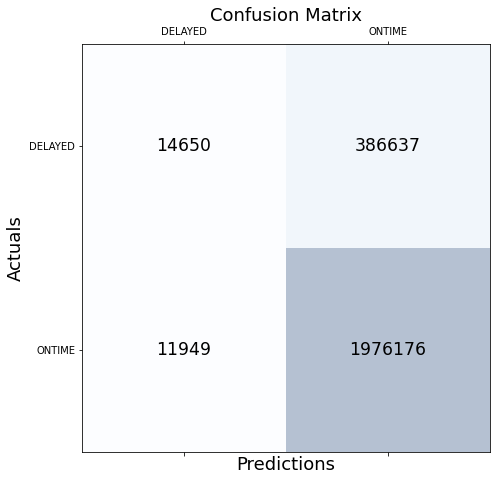

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
tickvalues = [0, 1]
plt.xticks(ticks = tickvalues ,labels = ['DELAYED', 'ONTIME'], rotation = 'horizontal')
plt.yticks(ticks = tickvalues ,labels = ['DELAYED', 'ONTIME'], rotation = 'horizontal')
plt.title('Confusion Matrix', fontsize=18)
plt.show()

### 2.1.2 NAIVE MODEL undersampled

This model uses undersampled data. Undersampled data and the model are pickled/saved for ease of use and can be loaded later

In [4]:
from imblearn.under_sampling import RandomUnderSampler

US = RandomUnderSampler(random_state=0)
usx, usy = US.fit_resample(X_train, Y_train)

Saving the undersampled data for later use

In [5]:
import numpy as np
np.save("usx", usx)
np.save("usy", usy)

model is built below using the undersampled data generated (or read) above, or it can be unpickled from an already-pickled model (two cells below)

In [6]:
from sklearn.naive_bayes import MultinomialNB

naive_model_us = MultinomialNB(alpha=0.01)
naive_model_us.fit(usx, usy)

MultinomialNB(alpha=0.01)

Model is pickled below for later use

In [7]:
import pickle

filename = 'Naive_undersampled_model.sav'
pickle.dump(naive_model_us, open(filename, 'wb'))

In [9]:
#classification
Y_predicted = naive_model_us.predict(X_test)

In [10]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(Y_test, Y_predicted))

              precision    recall  f1-score   support

     DELAYED       0.26      0.70      0.38    401287
      ONTIME       0.91      0.59      0.72   1988125

    accuracy                           0.61   2389412
   macro avg       0.58      0.65      0.55   2389412
weighted avg       0.80      0.61      0.66   2389412



In [11]:
conf_matrix = confusion_matrix(Y_test, Y_predicted)
print(conf_matrix)

[[ 282404  118883]
 [ 813349 1174776]]


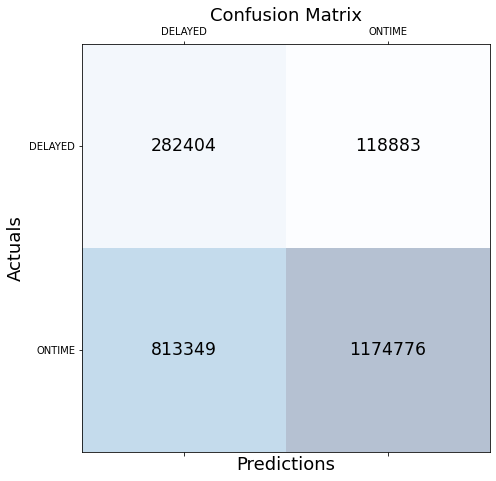

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
tickvalues = [0, 1]
plt.xticks(ticks = tickvalues ,labels = ['DELAYED', 'ONTIME'], rotation = 'horizontal')
plt.yticks(ticks = tickvalues ,labels = ['DELAYED', 'ONTIME'], rotation = 'horizontal')
plt.title('Confusion Matrix', fontsize=18)
plt.show()

### 2.1.3 NAIVE MODEL Sythetic Data Augmentation

This model uses <u>Synthetically Augmented Data</u>. Synthetically Augmented Data and the model are saved/pickled for ease of use and can be loaded later

In [54]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=0)
smox, smoy = smote.fit_resample(X_train, Y_train)

Saving the synthetically augmented data for later use

In [55]:
import numpy as np
np.save("smox", smox)
np.save("smoy", smoy)

model is generated below. It can also be alternatively unpickled from an already-pickled model

In [56]:
from sklearn.naive_bayes import MultinomialNB

naive_model_sda = MultinomialNB(alpha=0.01)
naive_model_sda.fit(smox, smoy)

MultinomialNB(alpha=0.01)

Pickling the model

In [57]:
import pickle

filename = 'Naive_sda_model.sav'
pickle.dump(naive_model, open(filename, 'wb'))

In [17]:
#classification
Y_predicted = naive_model_sda.predict(X_test)

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(Y_test, Y_predicted))

              precision    recall  f1-score   support

     DELAYED       0.26      0.70      0.38    401287
      ONTIME       0.91      0.59      0.72   1988125

    accuracy                           0.61   2389412
   macro avg       0.58      0.65      0.55   2389412
weighted avg       0.80      0.61      0.66   2389412



In [19]:
conf_matrix = confusion_matrix(Y_test, Y_predicted)
print(conf_matrix)

[[ 281775  119512]
 [ 807020 1181105]]


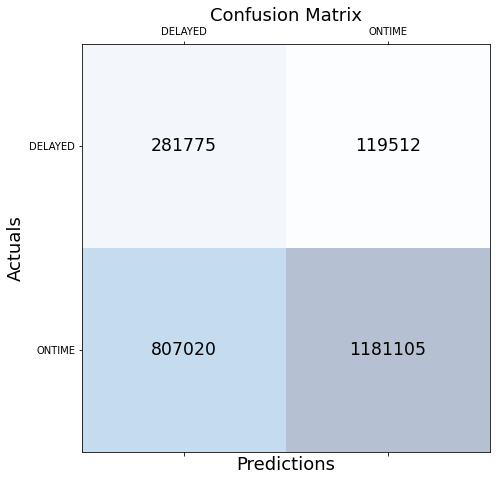

In [20]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
tickvalues = [0, 1]
plt.xticks(ticks = tickvalues ,labels = ['DELAYED', 'ONTIME'], rotation = 'horizontal')
plt.yticks(ticks = tickvalues ,labels = ['DELAYED', 'ONTIME'], rotation = 'horizontal')
plt.title('Confusion Matrix', fontsize=18)
plt.show()

### 2.1.4 Random Forest

Random Forest model was trained with three datasets.<br>
> 1. Original dataset<br>
> 2. Undersampled dataset<br>
> 3. Synthetically augmented dataset<br>

The following is built and trained using the original dataset

In [5]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
from sklearn import preprocessing

lb = preprocessing.LabelBinarizer()
Y2 = lb.fit_transform(Y_train)
#using this line of code because otherwise I will get the following error:
# could not convert string to float: 'ONTIME'

In [8]:
rf = RandomForestClassifier(n_estimators = 10, random_state = 42)
rf.fit(X_train, Y2.ravel())

RandomForestClassifier(n_estimators=10, random_state=42)

Random Forest model is pickled below for later use

In [9]:
import pickle

filename = 'rf_model.sav'
pickle.dump(rf, open(filename, 'wb'))

In [65]:
#classification
Y_predicted = rf.predict(X_test)

y_original = lb.inverse_transform(Y_predicted)

In [66]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(Y_test, y_original))

              precision    recall  f1-score   support

     DELAYED       0.71      0.36      0.48    401287
      ONTIME       0.88      0.97      0.92   1988125

    accuracy                           0.87   2389412
   macro avg       0.80      0.66      0.70   2389412
weighted avg       0.85      0.87      0.85   2389412



In [67]:
conf_matrix = confusion_matrix(Y_test, y_original)
print(conf_matrix)

[[ 143027  258260]
 [  57525 1930600]]


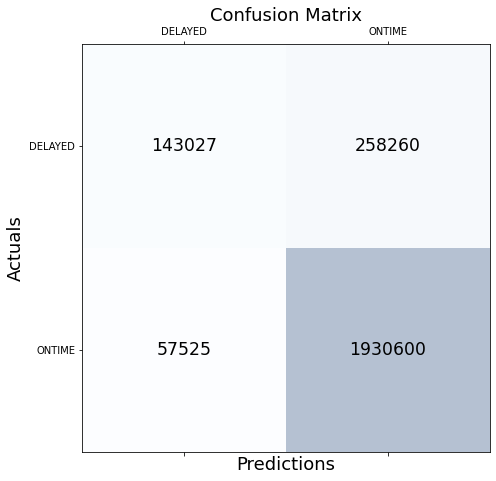

In [68]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
tickvalues = [0, 1]
plt.xticks(ticks = tickvalues ,labels = ['DELAYED', 'ONTIME'], rotation = 'horizontal')
plt.yticks(ticks = tickvalues ,labels = ['DELAYED', 'ONTIME'], rotation = 'horizontal')
plt.title('Confusion Matrix', fontsize=18)
plt.show()

### 2.1.5 Random Forest undersampled

In [197]:
from imblearn.under_sampling import RandomUnderSampler

US = RandomUnderSampler(random_state=0)
usx_rf, usy_rf = US.fit_resample(X_train, Y_train)

Saving the undersampled data for later use

In [198]:
import numpy as np
np.save("usx_rf", usx_rf)
np.save("usy_rf", usy_rf)

In [231]:
from sklearn.ensemble import RandomForestClassifier

from sklearn import preprocessing

lb = preprocessing.LabelBinarizer()
Y2 = lb.fit_transform(usy_rf)

Under-sampled random forest model is generated below. It can also be unpickled instead from an already-pickled model 

In [200]:
rf_u = RandomForestClassifier(n_estimators = 10, random_state = 42)

rf_u.fit(usx_rf, Y2.ravel())

RandomForestClassifier(n_estimators=10, random_state=42)

Undersamlped random forest model is pickled below

In [28]:
import pickle

filename = 'rf_u_model.sav'
pickle.dump(rf_u, open(filename, 'wb'))

In [235]:
#classification
Y_predicted = rf_u.predict(X_test)

y_original = lb.inverse_transform(Y_predicted)

In [236]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(Y_test, y_original))

              precision    recall  f1-score   support

     DELAYED       0.34      0.71      0.46    401287
      ONTIME       0.92      0.72      0.81   1988125

    accuracy                           0.72   2389412
   macro avg       0.63      0.71      0.63   2389412
weighted avg       0.83      0.72      0.75   2389412



In [237]:
conf_matrix = confusion_matrix(Y_test, y_original)
print(conf_matrix)

[[ 282981  118306]
 [ 554834 1433291]]


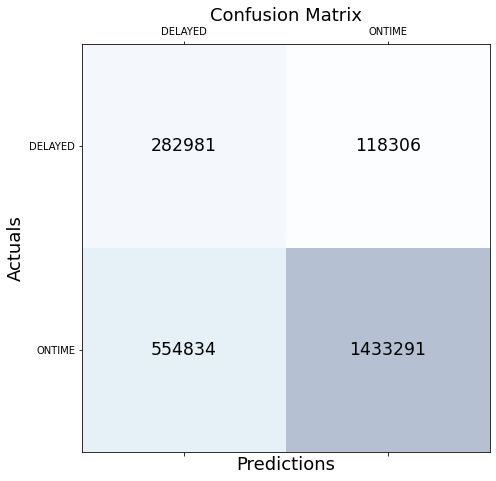

In [238]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
tickvalues = [0, 1]
plt.xticks(ticks = tickvalues ,labels = ['DELAYED', 'ONTIME'], rotation = 'horizontal')
plt.yticks(ticks = tickvalues ,labels = ['DELAYED', 'ONTIME'], rotation = 'horizontal')
plt.title('Confusion Matrix', fontsize=18)
plt.show()

### 2.1.6 Random Forest-Synthetic Data Augmentation

In [99]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=0)
smox_rf, smoy_rf = smote.fit_resample(X_train, Y_train)

Saving the synthetically augmented data for later use

In [100]:
import numpy as np
np.save("smox_rf", smox_rf)
np.save("smoy_rf", smoy_rf)

model is generated and fitted below. Alternativel you can unpickle the trained model

In [102]:
from sklearn.ensemble import RandomForestClassifier

from sklearn import preprocessing

lb = preprocessing.LabelBinarizer()
Y2 = lb.fit_transform(smoy_rf)

In [35]:
rf_sda = RandomForestClassifier(n_estimators = 10, random_state = 42)
rf_sda.fit(smox_rf, Y2.ravel())

RandomForestClassifier(n_estimators=10, random_state=42)

trained model is pickled below

In [103]:
import pickle

filename = 'rf_sda.sav'
pickle.dump(rf_sda, open(filename, 'wb'))

In [239]:
#classification
Y_predicted = rf_sda.predict(X_test)

y_original = lb.inverse_transform(Y_predicted)

In [240]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(Y_test, y_original))

              precision    recall  f1-score   support

     DELAYED       0.44      0.55      0.49    401287
      ONTIME       0.90      0.86      0.88   1988125

    accuracy                           0.81   2389412
   macro avg       0.67      0.71      0.69   2389412
weighted avg       0.83      0.81      0.82   2389412



In [242]:
conf_matrix = confusion_matrix(Y_test, y_original)
print(conf_matrix)

[[ 221757  179530]
 [ 277890 1710235]]


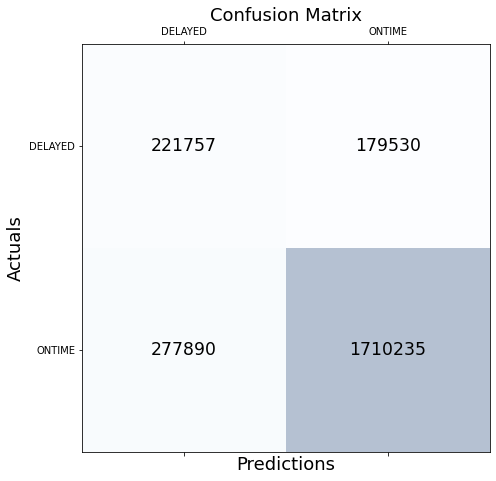

In [243]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
tickvalues = [0, 1]
plt.xticks(ticks = tickvalues ,labels = ['DELAYED', 'ONTIME'], rotation = 'horizontal')
plt.yticks(ticks = tickvalues ,labels = ['DELAYED', 'ONTIME'], rotation = 'horizontal')
plt.title('Confusion Matrix', fontsize=18)
plt.show()

## 2.2 AUC and ROC

In the code below, the <code>y_pred_proba</code> produces two floats for each flight. <br>
> The <u>first</u> one is the probability of the flight being <b>delayed</b> <br>
> and the <u>second</u> one is the likeklihood of flgiht being <b>ontime</b>

make sure all 6 trained models are un-pickled and loaded

In [244]:
from sklearn import metrics 

models = [("naive model", naive_model),
          ("naive model us", naive_model_us),          
          ("naive model sda", naive_model_sda), 
          ("random forest", rf), 
          ("random forest us", rf_u), 
          ("random forest sda", rf_sda)]

for model in models:
    y_pred_proba = model[1].predict_proba(X_test)[:,1]
    auc = metrics.roc_auc_score(Y_test, y_pred_proba)
    print (f"{model[0]}\t\t {auc}")


naive model		 0.7042952687530448
naive model us		 0.7039431193254221
naive model sda		 0.7048063201258564
random forest		 0.802009601904677
random forest us		 0.7836858114837579
random forest sda		 0.7921834587030753


According to the numbers seen above, <b>random forest</b> model is performing better than other alternative 

<b>ROC</b> curve plotted below for the best classification model that we have: Random Forest

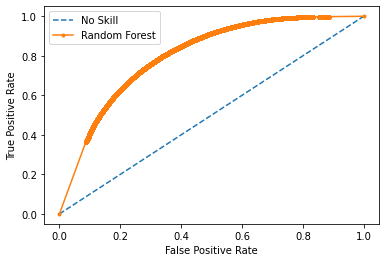

In [24]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot

yhat = rf.predict_proba(X_test)

yhat = yhat[:, 1]

Y_test2 = Y_test.map({'ONTIME': 1, 'DELAYED': 0}).astype(int)

fpr, tpr, thresholds = roc_curve(Y_test2, yhat)

pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Random Forest')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

## 2.3 Cost Function

For the sake of this project we assume that the cost of incorrectly predicting an ontime flight is <b><u>3 times</u></b> the cost of incorrectly predicting a delayed flight <br> The reasoning behind this argument is that in the case of the former, the user of this tool will miss the flight as opposed to the other way around when the passanger arrives early to the airport assuming the flight in ontime whereas it was indeed delayed

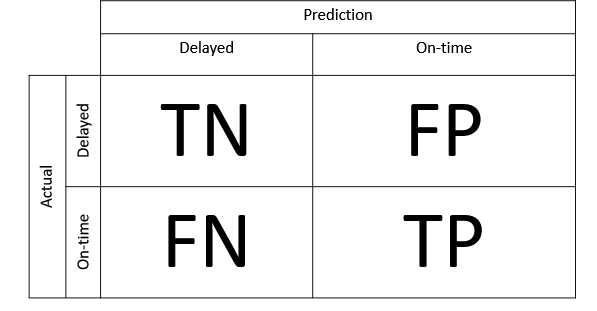


Cost Function = 3FN + FP


FN = FNR * (FN + TP) = FNR * actual number of ontime flights <br>
FP = FPR * (TN + FP) = FPR * actual number of delayed flights

In [25]:
# delyed flights

delayed_counts_test = sum(Y_test.map({'ONTIME': 0, 'DELAYED': 1}).astype(int))
ontime_counts_test = sum(Y_test.map({'ONTIME': 1, 'DELAYED': 0}).astype(int))

In [26]:
fnr = 1-tpr
fn = fnr*ontime_counts_test

fp = fpr*delayed_counts_test

cost_func = 3*fn + fp

# locate the index of the largest g-mean
ix = np.argmin(cost_func)
print('Best Threshold for random forest model=%f' % thresholds[ix])

Best Threshold for random forest model=0.200357


## 2.4 Linear Regression

if <code>X_train</code> and <code>Y_train</code> are already loaded, then please skip the cells below and proceed to training the model

In [108]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
X = ohe.fit_transform(big_df[predictors])
Y = big_df['DEP_DELAY']

In [109]:
from sklearn.model_selection import train_test_split

X_train, Xy_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=1)

model is trained below, alternatively you can unpickle the pickled model

In [111]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

pickling the trained model

In [24]:
import pickle

filename = 'lr_model.sav'
pickle.dump(lr, open(filename, 'wb'))

In [112]:
from dmba import regressionSummary

regressionSummary(Y_train, lr.predict(X_train))
regressionSummary(Y_test, lr.predict(X_test))


Regression statistics

               Mean Error (ME) : 0.0000
Root Mean Squared Error (RMSE) : 31.4989
     Mean Absolute Error (MAE) : 16.1679

Regression statistics

               Mean Error (ME) : -0.0319
Root Mean Squared Error (RMSE) : 31.3140
     Mean Absolute Error (MAE) : 16.1393


# 3. Predicting Flight Delay Probability

## 3.1 Selecting the model

Select one of the trained model above from the dropdown menu below to perform the probability calculation (<u>make sure to unpickle all of the pickled trained models before executing this cell</u>)

In [14]:
from ipywidgets import *

model = Dropdown(options = [('naive' ,naive_model), 
                     ('naive undersampled' ,naive_model_us), 
                     ('naive sda' ,naive_model_sda), 
                     ('random forest', rf), 
                     ('random forest undersampled',rf_u), 
                     ('random forest sda',rf_sda)])

def f(model):    
    return model

interact(f, model = model) 

interactive(children=(Dropdown(description='model', options=(('naive', MultinomialNB(alpha=0.01)), ('naive und…

<function __main__.f(model)>

## 2.2 Probablity on the entire data set

The following produces probability of delay prediction on the entire dataset and the amount of delay<br>
    make sure the <b>linear regression</b> model is unpickled here before being applied

In [15]:
predProb_all = model.value.predict_proba(X)

import pickle

filename = 'lr_model.sav'
lr = pickle.load(open(filename, 'rb'))
delay_amount_prediction = lr.predict(X)

The best threshold we obtained in section 2.3 is used below to make prediction on the entire dataset

In [27]:
Y = big_df['STATUS'].astype('category')
status_prediction = [0 if a[1] < thresholds[ix] else 1 for a in  model.value.predict_proba(X)]

df1 = pd.DataFrame({'actual': Y, 'prediction':status_prediction})
df2 = pd.DataFrame(predProb_all, index=Y.index)
df3 = pd.DataFrame({'dep delay(min)': delay_amount_prediction}, index=Y.index)

df = pd.concat([big_df[predictors], df1, df2, df3], axis=1)

In [28]:
df

,DAY_OF_WEEK,DEP_TIME,ORIGIN,DEST,OP_UNIQUE_CARRIER,actual,prediction,0,1,dep delay(min)
0,7,15,DFW,TUL,AA,ONTIME,1,0.000000,1.000000,7.893317
1,1,15,DFW,TUL,AA,DELAYED,1,0.045054,0.954946,9.665640
2,2,15,DFW,TUL,AA,ONTIME,1,0.105685,0.894315,8.178922
3,3,15,DFW,TUL,AA,ONTIME,1,0.051124,0.948876,8.294307
4,4,15,DFW,TUL,AA,ONTIME,1,0.041095,0.958905,10.606389
...,...,...,...,...,...,...,...,...,...,...
6085276,4,11,DEN,GJT,XE,ONTIME,1,0.000000,1.000000,5.449885
6085277,5,11,DEN,GJT,XE,ONTIME,1,0.000000,1.000000,4.654993
6085278,6,11,DEN,GJT,XE,ONTIME,1,0.241313,0.758687,2.906883
6085279,1,11,DEN,GJT,XE,ONTIME,1,0.000000,1.000000,4.509136


## 2.3 P(delayed | single predictor)

We can calculate the probabilty of the flight being delayed the following way

P(delayed | carrier, day_of_week, dep_time, dest, origin) ~ P(delayed|carrier) * ... * P(delayed|origin) = A <br>
P(on_time | carrier, day_of_week, dep_time, dest, origin) ~ P(on_time|carrier) * ... * P(on_time|origin) = B <br>
P(delayed | carrier, day_of_week, dep_time, dest, origin) = A/(A+B)


In the following, I have created a dictionary of all the tables that have <b>P(delayed or ontime | predictor)</b> for <u>each single one of our five predictors</u>

In [18]:
big_df['t'] =1

In [19]:
import numpy as np
P_df = {}
for predictor in predictors:
    table_name = 'Prob_Table_'+str(predictor)
    P_df[table_name] = pd.pivot_table(big_df, values='t', index=[predictor], columns=['STATUS'], aggfunc=np.sum)
    P_df[table_name]['%ONTIME'] = P_df[table_name]['ONTIME']/(P_df[table_name]['ONTIME'].sum()) 
    P_df[table_name]['%DELAYED'] = P_df[table_name]['DELAYED']/(P_df[table_name]['DELAYED'].sum())

In [20]:
P_df['Prob_Table_DAY_OF_WEEK']

STATUS,DELAYED,ONTIME,%ONTIME,%DELAYED
DAY_OF_WEEK,,,,
1,156721,729609,0.146812,0.156121
2,137074,720192,0.144917,0.136549
3,139098,724595,0.145803,0.138565
4,167705,723299,0.145542,0.167062
5,159604,735592,0.148016,0.158993
6,110038,636403,0.128057,0.109616
7,133606,699993,0.140853,0.133094


## 2.4 Probabilty drop down menu

The code below calculates probability of delay using two different method. The method described in 3.3 and in <code>proba</code> feature of the ML models<br>
Before proceeding to the execution of the code below<br> 
> 1. make sure that <b>secion 3.3</b> is already executed<br>
> 2. make sure the <b>linear regression</b> model is unpickled here before being applied<br>
> 3. make sure that the <code>ohe</code> is trained

The same optimum threshold determined in section 1.3 is used here to make prediction

In [29]:
from ipywidgets import *

origin = Dropdown(options = sorted(big_df['ORIGIN'].unique().tolist()))
dest = Dropdown()
dow = Dropdown()
carr = Dropdown()
tod = Dropdown()

grouped_df = big_df.groupby(by='ORIGIN')
grouped_df2 = big_df.groupby(by=['ORIGIN', 'DEST'])
grouped_df3 = big_df.groupby(by=['ORIGIN', 'DEST', 'DAY_OF_WEEK'])
grouped_df4 = big_df.groupby(by=['ORIGIN', 'DEST', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER'])
                    
# Define a function that updates the content of all dropdowns one-by-one based on what we select for the previous one
def update(*args):
    dest.options = sorted(grouped_df.get_group(origin.value)['DEST'].unique().tolist())
    dow.options = sorted(grouped_df2.get_group((origin.value, dest.value))['DAY_OF_WEEK'].unique().tolist())
    carr.options = sorted(grouped_df3.get_group((origin.value, dest.value, dow.value))['OP_UNIQUE_CARRIER'].unique().tolist())
    tod.options = sorted(grouped_df4.get_group((origin.value, dest.value, dow.value, carr.value))['DEP_TIME'].unique().tolist())
origin.observe(update)

# Function to calculate probability and linear regression function
def f(origin, destination, dow, airline, tod):
    A = P_df['Prob_Table_ORIGIN'].loc[origin, '%DELAYED']*\
        P_df['Prob_Table_DEST'].loc[destination, '%DELAYED']*\
        P_df['Prob_Table_DAY_OF_WEEK'].loc[1, '%DELAYED']*\
        P_df['Prob_Table_OP_UNIQUE_CARRIER'].loc[airline, '%DELAYED']*\
        P_df['Prob_Table_DEP_TIME'].loc[tod, '%DELAYED']
    
    B = P_df['Prob_Table_ORIGIN'].loc[origin, '%ONTIME']*\
        P_df['Prob_Table_DEST'].loc[destination, '%ONTIME']*\
        P_df['Prob_Table_DAY_OF_WEEK'].loc[1, '%ONTIME']*\
        P_df['Prob_Table_OP_UNIQUE_CARRIER'].loc[airline, '%ONTIME']*\
        P_df['Prob_Table_DEP_TIME'].loc[tod, '%ONTIME']
    
    model1_P = "{:.2f}".format(A/(A+B))
    model_P = model.value.predict_proba(ohe.transform([[dow,tod,origin,destination,airline]]))[0][0]
    delay_minutes = "{:.2f}".format(lr.predict(ohe.transform([[dow,tod,origin,destination,airline]]))[0])
    if model_P>=thresholds[ix]:
        status = 'delayed'
    else:
        status = 'ontime'
    model_P = "{:.2f}".format(model_P*100)
    return print(f"Probability of delay-method1:\t {model1_P} %", 
                 f"Probability of delay-{model.label}:\t {model_P} %", 
                 f"length of delay prediction:\t {delay_minutes} min",
                 f"predicted status:\t {status}",
                 
                 sep='\n')


interact(f,
         origin = origin,
         destination = dest,
         dow = dow,
         airline = carr,
         tod = tod
        );

interactive(children=(Dropdown(description='origin', options=('ABE', 'ABI', 'ABQ', 'ABY', 'ACK', 'ACT', 'ACV',…

# 4. Visualization

## 3.1 Heat Map using drop down menu

In [30]:
import ipywidgets as widgets
import matplotlib.pyplot as plt

big_df['ISDELAYED'] = [1 if delay>15 else 0 for delay in big_df['DEP_DELAY']]

agg = big_df.groupby(by=['ORIGIN', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER']).ISDELAYED.mean().fillna(0)
agg = agg.reset_index()

def heatmap(orig):    
    data = pd.pivot_table(agg[agg.ORIGIN==orig], values='ISDELAYED', aggfunc=np.sum,
                         index=['OP_UNIQUE_CARRIER'], columns=['DAY_OF_WEEK']
                         )

    import seaborn as sns

    data = data[[7, 1, 2, 3, 4, 5, 6]]
    ax = sns.heatmap(data, vmin=0, vmax=0.3
                    ,cmap=sns.light_palette("navy")
                    )
    ax.set_xticklabels(['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
    plt.show()
    

In [31]:
import numpy as np

widgets.interact(heatmap, orig=sorted(big_df['ORIGIN'].unique().tolist()));

interactive(children=(Dropdown(description='orig', options=('ABE', 'ABI', 'ABQ', 'ABY', 'ACK', 'ACT', 'ACV', '…